# Clase 5 : Pandas

En este modulo veremos:
-  Series
- Dataframe
- Read

## Pandas VI


### groupby
Como hemos visto, es muy fácil hacer estadísticas sobre columnas de un dataframe. Pero muchas veces estamos interesados en realizar **estadísticas a subconjuntos de esos datos según la categoría a la que pertenezcan.** Por ejemplo, encontrar el promedio de edad para hombres y mujeres, o para hombres y mujeres divididos también por la clase en la que viajaban.<br>
Para este tipo de operaciones existe el método groupby, que permite hacer los agrupamientos de una forma eficiente y sencilla. Este método crea una estructura de datos particular a la que le podemos aplicar diferentes operaciones estadísticas. Sólo cuando aplicamos estas operaciones se devuelve un dataframe con la información.<br>

Típicamente vamos a usar el groupby para agrupar los datos según los valores de una
o más columnas y lo vamos a combinar con algún método de va a realizar las
estadísticas sobre el resto de las columnas si es posible. <br>
**El método groupby sólo crea
la estructura de datos a la que se le puede aplicar la función de agregación.**

In [3]:
import pandas as pd
data= pd.read_csv("../Recursos/titanic.csv")
data.groupby("Sex").count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312
male,577,577,577,577,453,577,577,577,577,107,577


Si la operación a realizar solamente admite números, se aplica a las columnas numéricas exclusivamente. 

In [7]:
data.groupby("Sex").mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


Si queremos restringir el resultado a ciertas columnas podemos hacerlo de varias maneras:<br>
● Una es seleccionar la columna de interés luego de hacer las operaciones.<br>
● Otra es seleccionar las columnas necesarias antes de hacer el groupby (se debe incluir la columna con la que agrupar).<br>
● Y la otra opción es seleccionar la columna de interés después de hacer el groupby, pero antes de aplicar la función de agregación.<br>

In [8]:
data.groupby("Sex").mean()["Age"]

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [9]:
data[["Sex","Age"]].groupby("Sex").mean()

,Age
Sex,
female,27.915709
male,30.726645


In [10]:
data.groupby("Sex")["Age"].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [12]:
#Maximo de la edad en cada clase:
data[["Pclass","Age"]].groupby("Pclass").max()

,Age
Pclass,
1,80.0
2,70.0
3,74.0


In [13]:
#Cantidad de valores no nulos agrupados por sobrevivencia
data.groupby("Survived").size()

Survived
0    549
1    342
dtype: int64

En caso de querer realizar **varias operaciones a los mismos grupos se puede utilizar aggregate (o su alias, agg).**

In [17]:
data[["Pclass","Age"]].groupby("Pclass").agg(["max","min","mean","std"])

Age                            
         max   min       mean        std
Pclass                                  
1       80.0  0.92  38.233441  14.802856
2       70.0  0.67  29.877630  14.001077
3       74.0  0.42  25.140620  12.495398

También se puede agrupar por **varias categorías,** haciendo agrupamientos más específicos.<br>
Por ejemplo, el promedio de edad discriminando tanto por clase como por sexo. 

In [19]:
data[["Pclass","Sex","Age"]].groupby(["Pclass","Sex"]).mean()

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [20]:
data[["Pclass","Sex","Age"]].groupby(["Sex","Pclass"]).mean()

Age
Sex    Pclass           
female 1       34.611765
       2       28.722973
       3       21.750000
male   1       41.281386
       2       30.740707
       3       26.507589

In [21]:
# Proporcion de supervivencia por clase y sexo
data[["Survived","Pclass","Sex"]].groupby(["Pclass","Sex"]).mean()

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

## Pandas VII

## Gráficos
Pandas ofrece muchas facilidades para hacer gráficos de manera sencilla. Se basa en **Matplotlib**, el principal módulo de gráficos de Python.<br>
Podemos acceder a las funcionalidades para graficar a través del método plot. Permite acceder a distintos tipos de gráficos de forma sencilla. <br>
Por ejemplo, se pueden hacer histogramas con plot.hist(), gráficos de barras con plt.bar, y de torta con plt.pie().

### Histogramas

<AxesSubplot:ylabel='Frequency'>

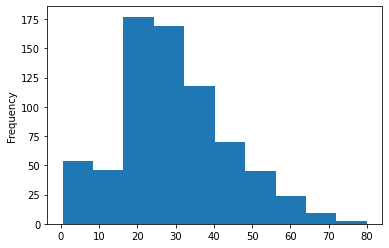

In [23]:
import matplotlib as plot
data["Age"].plot.hist()

Los métodos vienen con números **parámetros para controlar el aspecto del gráfico.**

<AxesSubplot:title={'center':'Distribucion de edades'}, ylabel='Frequency'>

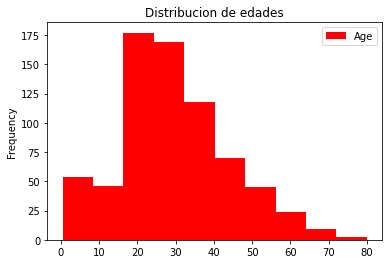

In [24]:
data["Age"].plot.hist(title="Distribucion de edades", legend=True , color= "RED" )

### Gráfico de barras
Este tipo de gráficos muestra barras de altura variable. En general, son útiles para mostrar estadísticas tomadas por categorías por medio de **groupby**

<AxesSubplot:xlabel='Sex'>

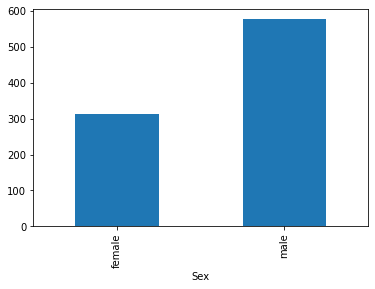

In [28]:
data.groupby("Sex").size().plot.bar()

<AxesSubplot:xlabel='Sex'>

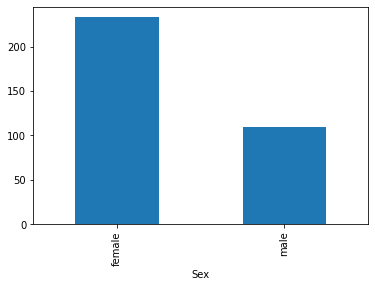

In [30]:
data.groupby("Sex")["Survived"].sum().plot.bar()

### Gráfico de torta
Otra forma de representar este tipo de información es el gráfico de tortas, donde el área de la cuña es proporcional al número que representa.

<AxesSubplot:title={'center':'Proporcion de hombres y mujeres'}, ylabel='None'>

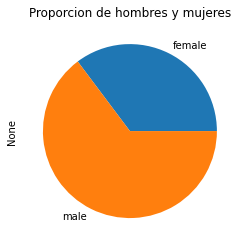

In [31]:
data.groupby("Sex").size().plot.pie(title="Proporcion de hombres y mujeres")

<AxesSubplot:title={'center':'Proporcion de hombres y mujeres sobrevivientes'}, ylabel='Survived'>

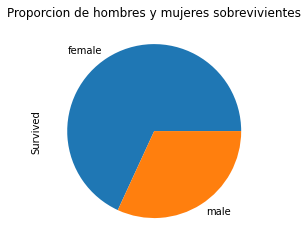

In [32]:
data.groupby("Sex")["Survived"].sum().plot.pie(title="Proporcion de hombres y mujeres sobrevivientes")

### Gráfico de líneas
Si los datos están ordenados se puede usar plot para representarlos sobre una línea en donde el eje x es el índice de la serie y el eje y es el valor.<br>
Si este método se aplica sobre un dataframe, las columnas numéricas se muestran en el mismo gráfico compartiendo el eje x. A continuación creamos un dataset para practicar. 

In [41]:
import numpy as np
arr = np.random.randn(1000,4).cumsum(axis=0)
arr

array([[-3.02114286e-01,  7.19840212e-01, -3.32644688e-01,
         2.91431025e-01],
       [-1.97825062e+00,  1.98437384e+00,  8.15736449e-01,
         5.79846204e-01],
       [-1.38457347e+00,  2.52655836e+00,  2.31609032e-02,
         1.23167447e+00],
       ...,
       [-3.87831401e+01,  2.03009770e+00,  8.00848112e+00,
         5.85667551e+01],
       [-3.87232807e+01,  1.43361269e+00,  7.08346963e+00,
         5.78081120e+01],
       [-3.90887608e+01,  8.21383270e-01,  7.07853210e+00,
         5.86283687e+01]])

In [40]:
df = pd.DataFrame(arr, columns=["A","B","C","D"])
df

,A,B,C,D
0,-1.359505,0.760911,0.275346,0.290402
1,-1.909639,-0.213308,1.668832,2.029063
2,-1.181666,-0.230138,0.912308,2.203908
3,0.287347,-1.116065,0.479176,0.874648
4,-0.786910,-2.091876,-0.218885,-0.592047
...,...,...,...,...
995,19.294013,-4.562464,31.382968,-4.264485
996,18.773629,-4.522468,30.753048,-4.811250
997,18.218077,-6.401042,30.721612,-4.312191
998,17.916950,-6.841192,31.920076,-5.835275


<AxesSubplot:>

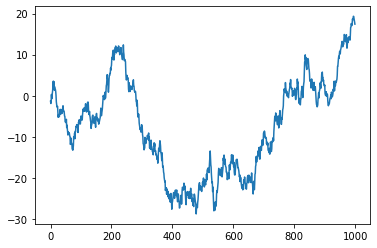

In [42]:
df["A"].plot()

<AxesSubplot:>

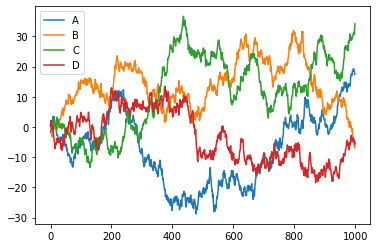

In [43]:
df.plot()

## Pandas VIII

## Missing values
Tener un dataset con missing values es un caso muy común a la hora de trabajar con datos. Puede suceder que algunos datos se hayan perdido, por lo que no estén disponibles, o que no se hayan recolectado correctamente. Incluso puede suceder que la información jamás haya existido.
**Existen varias técnicas a la hora de trabajar con missing values y pandas ofrece funcionalidades para manipularlos.**

**Para representar missing values pandas usa principalmente el valor np.nan (NaN: Not a Number).** Este es un valor especial dentro de los números flotantes.<br>
Otro valor especial dentro de los números flotantes es np.inf (que se usa para representar el infinito, no missing values).<br>
El otro valor que se usa para representar missing values es **None**, que es un tipo de dato de Python con un único valor. <br>

In [45]:
type(np.nan)

float

In [46]:
type(np.inf)

float

In [47]:
type(None)

NoneType

Como np.nan es un flotante, cuando se encuentra en una columna de enteros, toda la columna es promovida al tipo de dato flotante.<br>
**A la hora de hacer cálculos entre NaN y otros valores, el resultado siempre se promueve a NaN.** <br>
Sin embargo, algunos métodos permiten controlar cómo se trata los missing values. Los métodos
asociados a los operadores permite definir un valor a reemplazar para NaN antes de realizar la operación. <br>
A su vez, **las funciones de agregación también permiten controlar cómo se trata NaN.**
Por defecto son ignorados, pero se puede controlar con el parámetro **skipna.**

In [50]:
df= pd.DataFrame([[1,3,5,4,2],[8,2,np.nan, 1,5]], columns=["A","B","C","D","E"])
df

,A,B,C,D,E
0,1,3,5.0,4,2
1,8,2,NaN,1,5


In [51]:
df["A"] + df["C"]

0    6.0
1    NaN
dtype: float64

In [52]:
df["A"].add(df["C"],fill_value=0 )

0    6.0
1    8.0
dtype: float64

In [53]:
#Las funciones de agregacion tambien permiten controlar como tratar a los Nan:
df.mean()

A    4.5
B    2.5
C    5.0
D    2.5
E    3.5
dtype: float64

In [54]:
df.mean(skipna=False)

A    4.5
B    2.5
C    NaN
D    2.5
E    3.5
dtype: float64

### isna
Para detectar missing values está el método isna (o su alias, **isnull**).
Este método **mapea los datos del dataframe o serie a booleanos**. Sólo mapea np.nan y
None a True y cualquier otro valor a False. <br>
Alternativamente, está el método **notna (y su alias, notnull) para hacer el mapeo inverso.**

In [55]:
df.isna()

,A,B,C,D,E
0,False,False,False,False,False
1,False,False,True,False,False


In [56]:
df.notna()

,A,B,C,D,E
0,True,True,True,True,True
1,True,True,False,True,True


In [57]:
#Cantidad de null por columna en el dataset de Titanic:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [58]:
#Saber las columnas que presentan Nan
data.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

### dropna
Una forma de tratar los NaN es simplemente **descartarlos.**<br>
El método dropna elimina las filas que contengan al menos un NaN. Se puede limitar las columnas a considerar con el parámetro **subset**  o eliminar las filas con
todas las columnas NaN con how.

In [59]:
data.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


### fillna
Para no perder tanta información, también es posible **reemplazar los NaN por un valor
que consideremos apropiado con el método fillna.**<br>
Por ejemplo, reemplazar los NaN en la columna Age por el promedio de edad. 

In [60]:
data["Age"].fillna(data["Age"].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

### interpolate
Cuando tenemos datos ordenados (por ejemplo una serie de tiempo) se pueden interpolar los datos faltantes con el método interpolate. 

<AxesSubplot:>

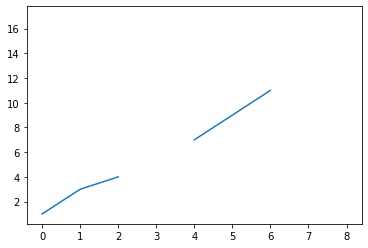

In [61]:
s = pd.Series([1,3,4,np.nan,7,9,11,np.nan,17])
s.plot()

<AxesSubplot:>

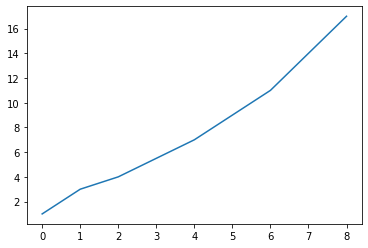

In [63]:
# Por defecto hace una interpolación lineal, pero se pueden especificar otros métodos.
s.interpolate().plot()

<AxesSubplot:>

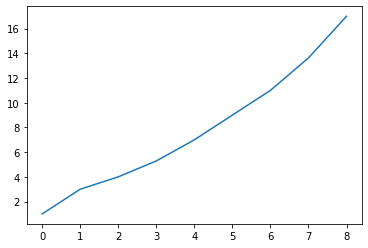

In [65]:
s.interpolate(method="quadratic").plot()

## Pandas IX

### Strings
Existen numerosos métodos para trabajar con strings en objetos tipo Series e Index (no aplica a Dataframes). <br>
En general, tienen el mismo nombre que los métodos de python para strings y están agrupados en el **atributo str**. Así es posible hacer operaciones sobre todos los elementos de la estructura con un único comando.<br>
Por ejemplo, para cambiar entre mayúsculas y minúsculas existen **lower, upper, title y swapcase.** 

In [67]:
data["Name"].str.lower()

0                                braund, mr. owen harris
1      cumings, mrs. john bradley (florence briggs th...
2                                 heikkinen, miss. laina
3           futrelle, mrs. jacques heath (lily may peel)
4                               allen, mr. william henry
                             ...                        
886                                montvila, rev. juozas
887                         graham, miss. margaret edith
888             johnston, miss. catherine helen "carrie"
889                                behr, mr. karl howell
890                                  dooley, mr. patrick
Name: Name, Length: 891, dtype: object

In [68]:
data["Name"].str.upper()

0                                BRAUND, MR. OWEN HARRIS
1      CUMINGS, MRS. JOHN BRADLEY (FLORENCE BRIGGS TH...
2                                 HEIKKINEN, MISS. LAINA
3           FUTRELLE, MRS. JACQUES HEATH (LILY MAY PEEL)
4                               ALLEN, MR. WILLIAM HENRY
                             ...                        
886                                MONTVILA, REV. JUOZAS
887                         GRAHAM, MISS. MARGARET EDITH
888             JOHNSTON, MISS. CATHERINE HELEN "CARRIE"
889                                BEHR, MR. KARL HOWELL
890                                  DOOLEY, MR. PATRICK
Name: Name, Length: 891, dtype: object

El método split permite **separar los strings en partes.** Por defecto, usa el
espacio en blanco como separador, pero **podemos definir cualquier carácter o substring para usar como separador.** Para cada elemento devuelve una lista con los strings que fueron separados.

In [69]:
data["Name"]

0                           [Braund,, Mr., Owen, Harris]
1      [Cumings,, Mrs., John, Bradley, (Florence, Bri...
2                             [Heikkinen,, Miss., Laina]
3      [Futrelle,, Mrs., Jacques, Heath, (Lily, May, ...
4                          [Allen,, Mr., William, Henry]
                             ...                        
886                            [Montvila,, Rev., Juozas]
887                    [Graham,, Miss., Margaret, Edith]
888       [Johnston,, Miss., Catherine, Helen, "Carrie"]
889                           [Behr,, Mr., Karl, Howell]
890                              [Dooley,, Mr., Patrick]
Name: Name, Length: 891, dtype: object

**El método count cuenta cuantas veces aparece un substring en cada elemento.**

In [70]:
data["Name"].str.count("Mr.")

0      1
1      1
2      0
3      1
4      1
      ..
886    0
887    0
888    0
889    1
890    1
Name: Name, Length: 891, dtype: int64

**El método contains devuelve True o False según cada string contenga o no cierto substring.**

In [71]:
data["Name"].str.contains("Mr.")

0       True
1       True
2      False
3       True
4       True
       ...  
886    False
887    False
888    False
889     True
890     True
Name: Name, Length: 891, dtype: bool

**Los métodos startswith y endswith permiten saber si cada string empieza o termina con cierto prefijo o sufijo.**

In [73]:
#Cuantos nombres empiezan con "Anderson"
data["Name"].str.startswith("Anderson").sum()

1

In [74]:
# Existe alguno que empiece con "Perez"?
data["Name"].str.startswith("Perez").any()

False

**El método len calcula la cantidad de caracteres de cada string, como si estuviéramos aplicando la función len a cada uno.**

In [75]:
data["Name"].str.len()

0      23
1      51
2      22
3      44
4      24
       ..
886    21
887    28
888    40
889    21
890    19
Name: Name, Length: 891, dtype: int64

También ha varios métodos para comprobar si los strings están compuestos por cierto tipo de caracteres.
- Los métodos isdigit, isnumeric e isdecimal permiten chequear que sean caracteres numéricos;
- isalpha que sean letras; 
- isalnum que sean letras o números;
- islower, isupper e istitle que cumplan con el formato.

El atributo str también permite hacer indexación y slices sobre los strings usando corchetes.<br>
En caso de indexar una posición mayor a la longitud del string se devuelve NaN.

In [76]:
data["Name"].str[0:3]

0      Bra
1      Cum
2      Hei
3      Fut
4      All
      ... 
886    Mon
887    Gra
888    Joh
889    Beh
890    Doo
Name: Name, Length: 891, dtype: object

In [77]:
data["Name"].str[40]

0      NaN
1        g
2      NaN
3        e
4      NaN
      ... 
886    NaN
887    NaN
888    NaN
889    NaN
890    NaN
Name: Name, Length: 891, dtype: object

## Pandas X

### Fechas
Para representar fechas y horas se utiliza un tipo de dato especial: **datetime64.** Y para representar intervalos de tiempo su usa **timedelta64**. Son tipos de datos que incorporan características y operaciones propias de trabajar y medir tiempos. <br>
<br>
Usualmente cuando leemos un archivo las fechas se representan como strings. Para convertirlo a
datetime64 se usa la función pd.to_datetime, que permite controlar el formato con el que se va a leer la información, que puede venir de diferentes formas: yyyy-mm-dd, dd/mm/yy, Month dd, yyyy, etc.<br>

Para esta sección vamos a usar de ejemplo el archivo GoldPrice.csv.
Este archivo contiene casi 10 años de registros en el precio del oro. La primera columna tiene strings que representan las fechas en el formato "Sep 11, 2020". Podemos convertir la columna al tipo de dato datetime con **pd.to_datetime.**

In [81]:
gold= pd.read_csv("../Recursos/GoldPrice.csv")
gold.head()

,Date,Price,Open,High,Low
0,"Aug 01, 2018",1216.6,1223.4,1223.4,1216.2
1,"Jul 31, 2018",1223.7,1220.4,1228.1,1213.0
2,"Jul 30, 2018",1221.3,1222.5,1223.9,1218.1
3,"Jul 27, 2018",1222.2,1223.5,1226.8,1216.7
4,"Jul 26, 2018",1225.3,1227.8,1227.8,1227.8


In [80]:
gold.dtypes

Date      object
Price    float64
Open     float64
High     float64
Low      float64
dtype: object

In [83]:
gold["Date"]=pd.to_datetime(gold["Date"])
gold.head()

,Date,Price,Open,High,Low
0,2018-08-01,1216.6,1223.4,1223.4,1216.2
1,2018-07-31,1223.7,1220.4,1228.1,1213.0
2,2018-07-30,1221.3,1222.5,1223.9,1218.1
3,2018-07-27,1222.2,1223.5,1226.8,1216.7
4,2018-07-26,1225.3,1227.8,1227.8,1227.8


In [84]:
gold.dtypes

Date     datetime64[ns]
Price           float64
Open            float64
High            float64
Low             float64
dtype: object

### Fechas
Los objetos de tipo datetime tienen varios **atributos, como year, month, day, hour, etc**. Para acceder a los atributos y métodos
propios del tipo de dato datetime se utiliza el **atributo dt.**

In [85]:
gold["Date"].dt.year

0       2018
1       2018
2       2018
3       2018
4       2018
        ... 
9766    1980
9767    1980
9768    1979
9769    1979
9770    1979
Name: Date, Length: 9771, dtype: int64

In [86]:
gold["Date"].dt.month

0        8
1        7
2        7
3        7
4        7
        ..
9766     1
9767     1
9768    12
9769    12
9770    12
Name: Date, Length: 9771, dtype: int64

In [87]:
gold["Date"].dt.day

0        1
1       31
2       30
3       27
4       26
        ..
9766     3
9767     2
9768    31
9769    28
9770    27
Name: Date, Length: 9771, dtype: int64

Podemos encontrar l**a fecha más antigua con min y la más reciente con max.**<br>
La **resta de fechas da una instancia de Timedelta**, que representa intervalos de tiempo. No se puede sumar dos fechas, pero sí se puede sumar un Datetime con un Timedelta. 

In [88]:
gold["Date"].min()

Timestamp('1979-12-27 00:00:00')

In [89]:
gold["Date"].max()

Timestamp('2018-08-01 00:00:00')

In [90]:
gold["Date"].max() - gold["Date"].min()

Timedelta('14097 days 00:00:00')

Cuando tenemos datos relacionados a fechas, podemos utilizar la serie de tiempo como índice. Esto le da mucha funcionalidad ya que podemos seleccionar datos refiriéndonos a las fechas. <br>
Para utilizar la columna de fechas como índice podemos usar **set_index.** En este caso pandas crea un tipo de dato especial, el **DatetimeIndex.** Como sólo se trata de fechas podemos acceder a los métodos directamente, sin pasar por el atributo dt. <br>
Ahora podemos seleccionar los datos según criterios temporales, como todos los datos de un año o de todos los lunes, usando indexing y filtros.

In [91]:
gold

,Date,Price,Open,High,Low
0,2018-08-01,1216.6,1223.40,1223.4,1216.20
1,2018-07-31,1223.7,1220.40,1228.1,1213.00
2,2018-07-30,1221.3,1222.50,1223.9,1218.10
3,2018-07-27,1222.2,1223.50,1226.8,1216.70
4,2018-07-26,1225.3,1227.80,1227.8,1227.80
...,...,...,...,...,...
9766,1980-01-03,625.0,627.00,640.0,603.00
9767,1980-01-02,575.5,562.50,577.0,558.00
9768,1979-12-31,533.6,527.88,534.5,527.88
9769,1979-12-28,517.8,516.00,517.8,510.40


In [94]:
gold.set_index("Date", inplace=True)


KeyError: "None of ['Date'] are in the columns"

In [95]:
gold

,Price,Open,High,Low
Date,,,,
2018-08-01,1216.6,1223.40,1223.4,1216.20
2018-07-31,1223.7,1220.40,1228.1,1213.00
2018-07-30,1221.3,1222.50,1223.9,1218.10
2018-07-27,1222.2,1223.50,1226.8,1216.70
2018-07-26,1225.3,1227.80,1227.8,1227.80
...,...,...,...,...
1980-01-03,625.0,627.00,640.0,603.00
1980-01-02,575.5,562.50,577.0,558.00
1979-12-31,533.6,527.88,534.5,527.88


In [96]:
gold.index

DatetimeIndex(['2018-08-01', '2018-07-31', '2018-07-30', '2018-07-27',
               '2018-07-26', '2018-07-25', '2018-07-24', '2018-07-23',
               '2018-07-20', '2018-07-19',
               ...
               '1980-01-10', '1980-01-09', '1980-01-08', '1980-01-07',
               '1980-01-04', '1980-01-03', '1980-01-02', '1979-12-31',
               '1979-12-28', '1979-12-27'],
              dtype='datetime64[ns]', name='Date', length=9771, freq=None)

In [97]:
#Seleccionamos el año 2016
gold["2016"]

/var/folders/dg/6_r7rq7x6kz1nd7cvm_j9wvr0000gn/T/ipykernel_16902/3546037688.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  gold["2016"]


,Price,Open,High,Low
Date,,,,
2016-12-30,1150.00,1162.0,1162.00,1151.0
2016-12-29,1156.40,1143.8,1158.80,1143.6
2016-12-28,1139.40,1141.2,1141.20,1138.0
2016-12-27,1137.30,1134.3,1142.20,1134.3
2016-12-26,1134.55,1135.0,1136.05,1134.0
...,...,...,...,...
2016-01-08,1097.80,1111.1,1111.10,1093.0
2016-01-07,1107.70,1091.6,1109.40,1091.6
2016-01-06,1091.90,1081.6,1093.70,1081.6


In [98]:
#Seleccionamos  registros posteriores a una fecha
gold[gold.index > "2018-4-10"]

,Price,Open,High,Low
Date,,,,
2018-08-01,1216.6,1223.4,1223.4,1216.2
2018-07-31,1223.7,1220.4,1228.1,1213.0
2018-07-30,1221.3,1222.5,1223.9,1218.1
2018-07-27,1222.2,1223.5,1226.8,1216.7
2018-07-26,1225.3,1227.8,1227.8,1227.8
...,...,...,...,...
2018-04-17,1347.2,1348.0,1348.1,1339.0
2018-04-16,1347.5,1341.0,1348.8,1341.0
2018-04-13,1344.8,1335.9,1346.0,1335.9


In [100]:
# Seleccionar los lunes:
gold[gold.index.dayofweek==0]

,Price,Open,High,Low
Date,,,,
2018-07-30,1221.3,1222.50,1223.9,1218.10
2018-07-23,1224.0,1222.00,1222.0,1222.00
2018-07-16,1238.1,1242.70,1243.8,1242.70
2018-07-09,1258.1,1258.20,1262.3,1257.70
2018-07-02,1239.8,1249.90,1249.9,1239.80
...,...,...,...,...
1980-01-28,638.0,634.00,643.0,606.00
1980-01-21,825.5,875.00,875.0,812.00
1980-01-14,671.0,672.00,672.0,650.00
